In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support

### Dataset description

The dataset contains data for loan applications.
The objective is to predict the loan status: 1 - default, 0 - non-default.
Therefore, it affects the loan approval result.

### Exploring data

In [2]:
cr_loan = pd.read_csv('/home/artur/Datasets/Credit_risk/cr_loan2.csv')
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
cr_loan.shape

(32581, 12)

In [4]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Text(0.5, 0, 'Loan Amount')

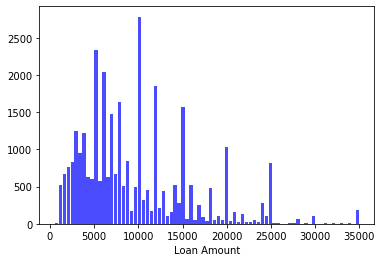

In [5]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")


Text(0, 0.5, 'Persone Age')

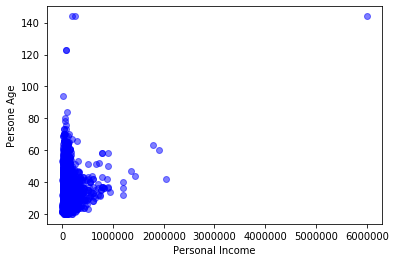

In [6]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')


The ouliers are obvious here. We are to fix it later.

In [7]:
# Create a cross table of the loan intent and loan status
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [8]:
# Create a cross table of home ownership, loan status, and grade
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [9]:
# Create a cross table of home ownership, loan status, and average percent income
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


Text(0.5, 0.98, '')

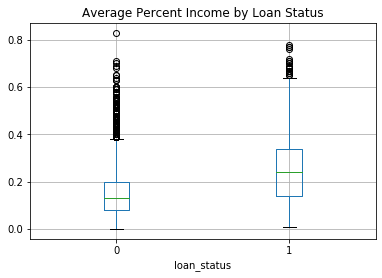

In [10]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')

### Removing outliers

In [11]:
# Create the cross table for loan status, home ownership, and the max employment length
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


In [12]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

In [13]:
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

In [14]:
# Create the cross table from earlier and include minimum employment length
pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

Text(0, 0.5, 'Loan Amount')

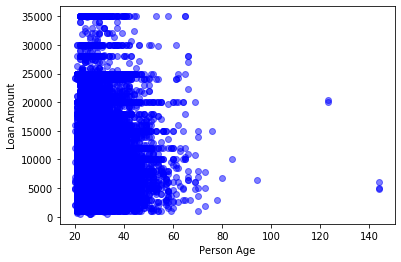

In [15]:
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")

Text(0, 0.5, 'Loan Interest Rate')

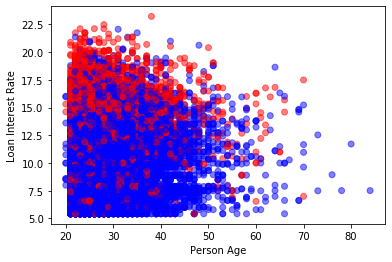

In [16]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")

### Handling missing data

In [17]:
cr_loan.columns[cr_loan.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [18]:
cr_loan[cr_loan['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [19]:
# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

Text(0.5, 0, 'Person Employment Length')

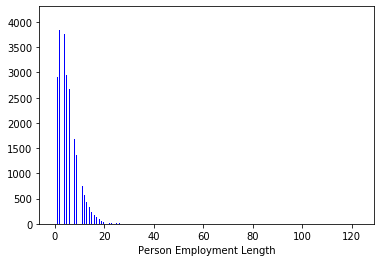

In [20]:
# Create a histogram of employment length
plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")

In [21]:
cr_loan['loan_int_rate'].isnull().sum()

3116

In [22]:
# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

## Logistic regression baseline

In [23]:
cr_loan_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [24]:
cr_loan_clean.shape

(29465, 12)

In [25]:
# One-hot encoding
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

cr_one_hot = pd.get_dummies(cred_str)

cr_loan_prep = pd.concat([cred_num, cr_one_hot], axis=1)
cr_loan_prep.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [26]:
cr_loan_prep.shape

(29465, 27)

In [27]:
# Feature-target split
X = cr_loan_prep.drop(['loan_status'], axis=1)
y = cr_loan_prep['loan_status']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [103]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

print('F1 on train:', round(f1_score(y_train, y_pred_train), 4))
print('F1 on test: ', round(f1_score(y_test, y_pred), 4))

F1 on train: 0.2741
F1 on test:  0.2632


The results are not great. Let's check if we can improve it by changing the threshold.

In [30]:
y_pred_proba = logreg.predict_proba(X_test)
preds_df = pd.DataFrame(y_pred_proba[:, 1], columns=['prob_default'])
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
preds_df['loan_status'].value_counts()

0    11222
1      564
Name: loan_status, dtype: int64

### ROC Curve

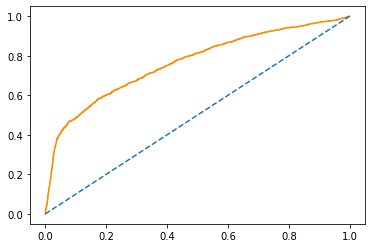

In [31]:
prob_default = y_pred_proba[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')

In [32]:
auc = roc_auc_score(y_test, prob_default)
auc

0.7630803900785401

### Classification report

In [33]:
target_names = ['Non-Default', 'Default']

print(round(f1_score(y_train, y_pred_train), 4))
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.80      0.98      0.88      9159
     Default       0.74      0.16      0.26      2627

    accuracy                           0.80     11786
   macro avg       0.77      0.57      0.57     11786
weighted avg       0.79      0.80      0.75     11786



We see that recall is only 17%. This means that 84% of the default loans will be our unexpected loss. We are to figure out, how to fix that.

In [34]:
print(confusion_matrix(y_test,preds_df['loan_status']))

[[9015  144]
 [2207  420]]


Let's check the recall for a changed threshold from 0.5 to 0.4.

In [35]:
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

In [36]:
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8492  667]
 [1434 1193]]


In [37]:
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.93      0.89      9159
     Default       0.64      0.45      0.53      2627

    accuracy                           0.82     11786
   macro avg       0.75      0.69      0.71     11786
weighted avg       0.81      0.82      0.81     11786



We see that the recall was improved. Let's find out the impact caused by this value. How much money we can lose with this recall? We need to calculate average loan amount for that.

In [72]:
avg_loan_amnt = cr_loan_prep['loan_amnt'].mean()

preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

false_nondef = confusion_matrix(y_test,preds_df['loan_status'])[1][0]
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]
loss = false_nondef * avg_loan_amnt
round(loss, 2)

13744523.77

How can we optimize the threshold? Let's visualize precision, recall and accuracy.

In [39]:
thresh = np.linspace(0, 0.75, num=100)
def_recalls = []
nondef_recalls = []
accs = []
for i in thresh:
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > i else 0)
    def_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])
    nondef_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0][1])
    accs.append(accuracy_score(y_test, preds_df['loan_status']))
    

/home/artur/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


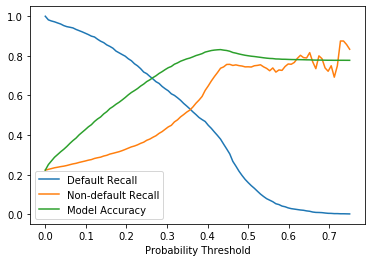

In [40]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])

We see that the threshold of about 0.275 is a good starting point, however it is a bit skewed to Default Recall compared to Non-default. Let's check the impact in this point.

In [81]:
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.275 else 0)
preds_df['loan_status'].value_counts()

0    7429
1    4357
Name: loan_status, dtype: int64

In [82]:
precision_recall_fscore_support(y_test,preds_df['loan_status'])

(array([0.88248755, 0.40257058]),
 array([0.71579867, 0.66768177]),
 array([0.79045093, 0.50229095]),
 array([9159, 2627]))

In [83]:
print(confusion_matrix(y_test,preds_df['loan_status']))

[[6556 2603]
 [ 873 1754]]


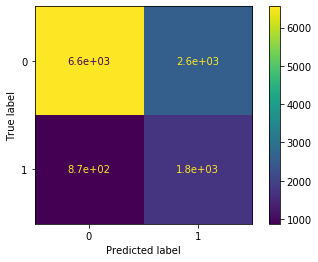

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds_df['loan_status'])
cm_display = ConfusionMatrixDisplay(cm, display_labels=preds_df['loan_status']).plot()

In [84]:
false_nondef = confusion_matrix(y_test,preds_df['loan_status'])[1][0]
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]
loss = false_nondef * avg_loan_amnt
round(loss, 2)

8367482.05

The unexpected loss is relatively lower at this threshold while accuracy is acceptable. 

In [93]:
from sklearn.metrics import f1_score

In [95]:
f1_score(y_test, preds_df['loan_status'])

0.5022909507445591

### Random forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {'n_estimators': [100, 500, 1000], 'max_depth': [3, 7, 10], 'max_features': [5, 14]}

grid_search = GridSearchCV(rfc, param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=1)
print('GridSearchCV is fitting...\n')
grid_search.fit(X_train, y_train)
    
print('Best hyperparameters: ', grid_search.best_params_, '\n')

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
     print(round(mean_score, 4), params)

GridSearchCV is fitting...

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.8min finished


Best hyperparameters:  {'max_depth': 10, 'max_features': 14, 'n_estimators': 1000} 

0.5755 {'max_depth': 3, 'max_features': 5, 'n_estimators': 100}
0.5644 {'max_depth': 3, 'max_features': 5, 'n_estimators': 500}
0.5599 {'max_depth': 3, 'max_features': 5, 'n_estimators': 1000}
0.701 {'max_depth': 3, 'max_features': 14, 'n_estimators': 100}
0.6903 {'max_depth': 3, 'max_features': 14, 'n_estimators': 500}
0.6862 {'max_depth': 3, 'max_features': 14, 'n_estimators': 1000}
0.7855 {'max_depth': 7, 'max_features': 5, 'n_estimators': 100}
0.7903 {'max_depth': 7, 'max_features': 5, 'n_estimators': 500}
0.7912 {'max_depth': 7, 'max_features': 5, 'n_estimators': 1000}
0.8013 {'max_depth': 7, 'max_features': 14, 'n_estimators': 100}
0.8016 {'max_depth': 7, 'max_features': 14, 'n_estimators': 500}
0.8015 {'max_depth': 7, 'max_features': 14, 'n_estimators': 1000}
0.8019 {'max_depth': 10, 'max_features': 5, 'n_estimators': 100}
0.8034 {'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
0.8032 {

In [106]:
rfc = RandomForestClassifier(n_estimators=5000, max_depth=30, n_jobs=-1, random_state=1, min_samples_leaf=5)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
print('F1 on train:', round(f1_score(y_train, y_pred_train), 4))
y_pred = rfc.predict(X_test)
print('F1 on test:', round(f1_score(y_test, y_pred), 4))

F1 on train: 0.8369
F1 on test: 0.8241
